# WTA

In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_files = glob.glob("../data/*")

In [3]:
dfs = []
for file in data_files:
    dfs.append(pd.read_excel(file))

/usr/local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
df = pd.concat(dfs)
df = df.reset_index(drop=True)

In [5]:
df.isna().mean()

ATP           0.000000
Location      0.000000
Tournament    0.000000
Date          0.000000
Series        0.000000
Court         0.000000
Surface       0.000000
Round         0.000000
Best of       0.000000
Winner        0.000000
Loser         0.000000
WRank         0.000341
LRank         0.001754
W1            0.005314
L1            0.005262
W2            0.014663
L2            0.014646
W3            0.534504
L3            0.534521
W4            0.907235
L4            0.907235
W5            0.964883
L5            0.964883
Wsets         0.004632
Lsets         0.004666
Comment       0.000000
CBW           0.701863
CBL           0.701863
GBW           0.913911
GBL           0.913911
IWW           0.772506
IWL           0.772506
SBW           0.907626
SBL           0.907626
B365W         0.148064
B365L         0.147672
B&WW          0.981317
B&WL          0.981317
EXW           0.328809
EXL           0.328724
PSW           0.255203
PSL           0.255203
WPts          0.276031
LPts       

In [6]:
df = df[((df['LRank'] != 'NR') & ~df['LRank'].isna()) & ((df['WRank'] != 'NR') & ~df['WRank'].isna())]

In [7]:
df["LRank"] = df["LRank"].astype(int)
df["WRank"] = df["WRank"].astype(int)

# Player Agnostic

In [8]:
df[["Round", "Court", "Surface", "Location", "Best of", "WRank", "LRank"]]

,Round,Court,Surface,Location,Best of,WRank,LRank
0,1st Round,Outdoor,Hard,Adelaide,3,63,77
1,1st Round,Outdoor,Hard,Adelaide,3,5,56
2,1st Round,Outdoor,Hard,Adelaide,3,40,655
3,1st Round,Outdoor,Hard,Adelaide,3,65,87
4,1st Round,Outdoor,Hard,Adelaide,3,81,198
...,...,...,...,...,...,...,...
58713,Quarterfinals,Outdoor,Hard,Melbourne,3,112,77
58714,Quarterfinals,Outdoor,Hard,Melbourne,3,28,57
58715,Semifinals,Outdoor,Hard,Melbourne,3,112,28
58716,Semifinals,Outdoor,Hard,Melbourne,3,6,95


In [11]:
df[df["LRank"] < df["WRank"]][["WRank", "LRank"]]

,WRank,LRank
10,55,21
12,208,122
13,142,79
14,84,20
15,227,88
...,...,...
58709,112,26
58710,57,55
58711,95,88
58713,112,77


In [12]:
df = df.assign(rank_diff = abs(df["WRank"] - df["LRank"]))

In [13]:
df = df.assign(better_rank_wins = df["WRank"] < df["LRank"])

In [15]:
df_m = df[["Round", "Court", "Surface", "Location", "Best of", "rank_diff", "better_rank_wins"]]

In [16]:
df_m

,Round,Court,Surface,Location,Best of,rank_diff,better_rank_wins
0,1st Round,Outdoor,Hard,Adelaide,3,14,True
1,1st Round,Outdoor,Hard,Adelaide,3,51,True
2,1st Round,Outdoor,Hard,Adelaide,3,615,True
3,1st Round,Outdoor,Hard,Adelaide,3,22,True
4,1st Round,Outdoor,Hard,Adelaide,3,117,True
...,...,...,...,...,...,...,...
58713,Quarterfinals,Outdoor,Hard,Melbourne,3,35,False
58714,Quarterfinals,Outdoor,Hard,Melbourne,3,29,True
58715,Semifinals,Outdoor,Hard,Melbourne,3,84,False
58716,Semifinals,Outdoor,Hard,Melbourne,3,89,True


In [18]:
df[df['better_rank_wins'] == False]['rank_diff'].describe()

count    20419.000000
mean        56.397032
std         85.010586
min          0.000000
25%         15.000000
50%         33.000000
75%         65.000000
max       1711.000000
Name: rank_diff, dtype: float64

<AxesSubplot:xlabel='better_rank_wins', ylabel='rank_diff'>

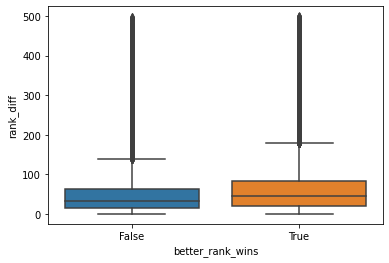

In [31]:
sns.boxplot(data=df_m[['rank_diff','better_rank_wins']].query('rank_diff < 500 and rank_diff > -500'), y="rank_diff", x="better_rank_wins")

In [21]:
df_m["better_rank_wins"].mean()

0.6513565659842574